# Diffusion Models

Implement a Score matching generative model in JAX to emulate posterior distribtions. Package name is fusions for diffusion meets ns (primarily constricted by what is available on pypi)

In [1]:
from fusions.model import NestedDiffusionModel
import numpy as np
import matplotlib.pyplot as plt
import anesthetic as ns

Package wraps up everything in a class, designed to wrap around anesthetic (although currently just taking numpy arrays)

In [2]:
chains=ns.read_chains("gaussian")
dims=5
model = NestedDiffusionModel(chains,steps=1000)


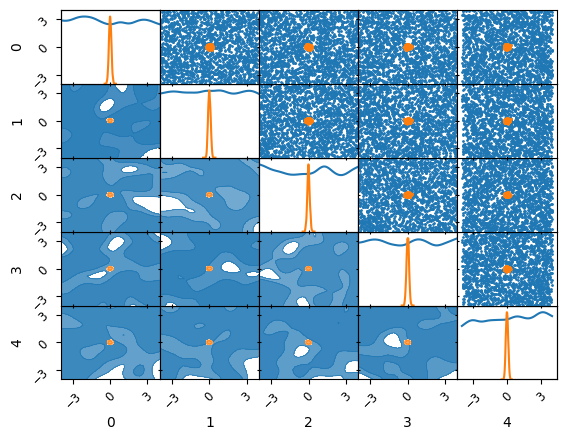

In [3]:
a=chains.set_beta(0.0).plot_2d(np.arange(dims))
a=chains.plot_2d(a);

## Train the model and use it to make predictions

In [4]:
model.train(n_epochs=1000,batch_size=512,lr=1e-3)

100%|██████████| 1000/1000 [00:17<00:00, 57.05it/s]


In [5]:
x0=model.sample_prior(1000)
x1= model.predict(x0)
x1,x1_t=model.sample_posterior(1000,history=True)
x1

TypeError: Only length-1 arrays can be converted to Python scalars.

Accuracy needs adjusting and plenty to play around with in terms of beta schedule etc. We can do cool things like plot trajectories of prior samples as a function of time as we diffuse them

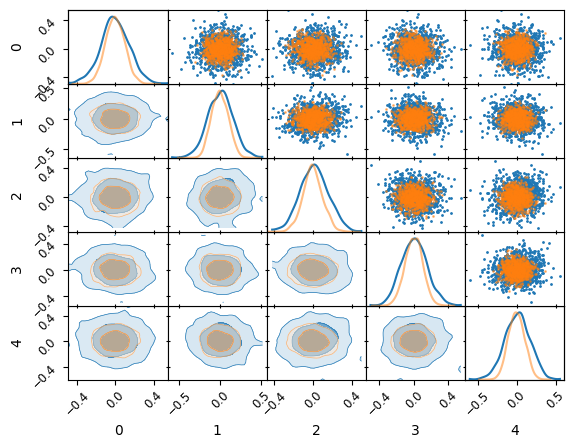

In [7]:
a=ns.MCMCSamples(x1).plot_2d(np.arange(dims))
chains.plot_2d(a,alpha=0.5);

In [8]:
param_idx=0
plt.plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
plt.plot(x1_t[:,101,param_idx], color="C0")

NameError: name 'x1_t' is not defined

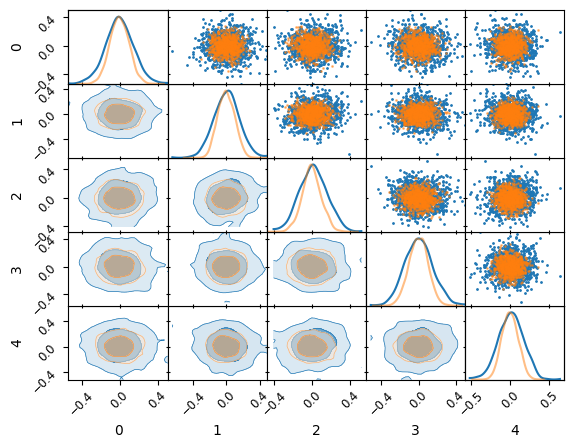

In [11]:
# x0=np.random.randn(100,5)*0.1
# x0=np.zeros((100,5))
# x1,x1_t=model.predict(x0,history=True)
x1,x1_t=model.sample_posterior(1000,history=True)

# a=ns.MCMCSamples(x0).plot_2d(np.arange(dims))
# ns.MCMCSamples(x1).plot_2d(a);
# a=ns.MCMCSamples(x1_t[500,...]).plot_2d(np.arange(dims))
a=ns.MCMCSamples(x1).plot_2d(np.arange(dims));
chains.plot_2d(a,alpha=0.5);
# chains.set_beta(0.6).plot_2d(a,alpha=0.5);

In [ ]:
param_idx=0
plt.plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
plt.plot(x1_t[:,101,param_idx], color="C0")

# Sequential Nested Diffusion

In [ ]:
a=chains.set_beta(0.0).plot_2d(np.arange(dims))
chains.set_beta(0.05).plot_2d(a)
a=chains.plot_2d(a);

In [ ]:
chains=ns.read_chains("gaussian")
model_1 = NestedDiffusionModel(chains,steps=1000)
model_2 = NestedDiffusionModel(chains,steps=1000)


In [ ]:
model_1.train(n_epochs=2000,batch_size=512,lr=1e-3,beta_prior=0.0,beta_posterior=0.01)
model_2.train(n_epochs=2000,batch_size=512,lr=1e-3,beta_prior=0.01,beta_posterior=1.0)

In [ ]:
x1,x1_t=model_1.sample_posterior(1000,history=True)
x2,x2_t=model_2.predict(x1,history=True)

In [ ]:
a=ns.MCMCSamples(x2).plot_2d(np.arange(dims))
a=ns.MCMCSamples(x1).plot_2d(a)
chains.plot_2d(a)

In [ ]:
f,a = plt.subplots(1,2,figsize=(10,5),sharey=True)
param_idx=2
a[0].plot(x1_t[:,:100,param_idx], color="gray", alpha=0.7);
a[0].plot(x1_t[:,101,param_idx], color="C0")
a[1].plot(x2_t[:,:100,param_idx], color="gray", alpha=0.7);
a[1].plot(x2_t[:,101,param_idx], color="C0")
# a[0].set_xscale("log")
# a[1].set_xscale("log")
a[0].set_xlim(0,1000)
a[1].set_xlim(0,1000)

plt.subplots_adjust(wspace=0)
